In [1]:
import json
from pathlib import Path
import pandas as pd

path = Path("Data\playerank.json")  # adjust if needed

with path.open("r", encoding="utf-8") as f:
    data_player_rank = json.load(f)   # Python list[dict]

# Convert to DataFrame
df_player_rank = pd.DataFrame(data_player_rank)

# Peek at first rows
print(type(df_player_rank), df_player_rank.shape)
display(df_player_rank.head())  # if Jupyter; otherwise print(df_player_rank.head())


<class 'pandas.core.frame.DataFrame'> (46897, 6)


,goalScored,playerankScore,matchId,playerId,roleCluster,minutesPlayed
0,0,0.0053,2057991,10014,right CB,90
1,0,0.0009,2057992,10014,right CB,41
2,0,-0.0013,2057998,100140,central MF,90
3,0,0.0031,2058000,100140,left CB,90
4,0,0.0035,2499869,10108,right CB,90


In [2]:
# Load players.json → flattened pandas DataFrame named df_players
import json
import pandas as pd
from pathlib import Path
from pandas import json_normalize

# 1) Find the file
candidates = [
    Path("players.json"),
    Path("Data") / "players.json",
    Path("data") / "players.json",
    Path("../Data") / "players.json",
]
path = next((p for p in candidates if p.exists()), None)

# 2) Read JSON (fallback to JSONL if needed)
if path is None:
    raise FileNotFoundError(
        "players.json not found. Place it under ./Data/ or update the path list."
    )

try:
    with path.open("r", encoding="utf-8") as f:
        records = json.load(f)  # list[dict]
except json.JSONDecodeError:
    with path.open("r", encoding="utf-8") as f:
        records = [json.loads(line) for line in f if line.strip()]

# 3) Flatten nested dicts (passportArea, birthArea, role, etc.)
df_players = json_normalize(records, sep=".")

# 4) Basic cleaning: turn string "null" into NA, nicer column names, dtypes
df_players = df_players.replace({"null": pd.NA})
df_players.columns = [c.replace(".", "_") for c in df_players.columns]

# Best-effort numeric conversions
num_cols = [
    "wyId", "currentTeamId", "currentNationalTeamId",
    "height", "weight",
    "passportArea_id", "birthArea_id"
]
for c in num_cols:
    if c in df_players.columns:
        df_players[c] = pd.to_numeric(df_players[c], errors="coerce").astype("Int64")

# 5) Show the table (first 20 rows)
display(df_players.head(20))
print("df_players shape:", df_players.shape)


,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,wyId,foot,shortName,...,passportArea_id,passportArea_alpha3code,passportArea_alpha2code,role_code2,role_code3,role_name,birthArea_name,birthArea_id,birthArea_alpha3code,birthArea_alpha2code
0,78,Harun,,Tekin,4502,1989-06-17,187,32777,right,H. Tekin,...,792,TUR,TR,GK,GKP,Goalkeeper,Turkey,792,TUR,TR
1,73,Malang,,Sarr,3775,1999-01-23,182,393228,left,M. Sarr,...,686,SEN,SN,DF,DEF,Defender,France,250,FRA,FR
2,72,Over,,Mandanda,3772,1998-10-26,176,393230,,O. Mandanda,...,250,FRA,FR,GK,GKP,Goalkeeper,France,250,FRA,FR
3,82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,32793,right,A. N'Diaye,...,686,SEN,SN,MD,MID,Midfielder,France,250,FRA,FR
4,84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,393247,right,I. Konat\u00e9,...,250,FRA,FR,DF,DEF,Defender,France,250,FRA,FR
5,83,Jasper,,Cillessen,676,1989-04-22,185,33,right,J. Cillessen,...,528,NLD,NL,GK,GKP,Goalkeeper,Netherlands,528,NLD,NL
6,91,Toby,,Alderweireld,1624,1989-03-02,187,36,right,T. Alderweireld,...,56,BEL,BE,DF,DEF,Defender,Belgium,56,BEL,BE
7,88,Jan,,Vertonghen,1624,1987-04-24,189,48,left,J. Vertonghen,...,56,BEL,BE,DF,DEF,Defender,Belgium,56,BEL,BE
8,74,Alexander,,Djiku,3783,1994-08-09,182,229427,right,A. Djiku,...,250,FRA,FR,DF,DEF,Defender,France,250,FRA,FR
9,76,Christian,,Dannemann Eriksen,1624,1992-02-14,180,54,right,C. Eriksen,...,208,DNK,DK,MD,MID,Midfielder,Denmark,208,DNK,DK


df_players shape: (3603, 22)


In [3]:
# Load coaches.json → flattened pandas DataFrame named df_coaches
import json
import pandas as pd
from pathlib import Path
from pandas import json_normalize

# 1) Localizar o ficheiro (ajusta/ordena as opções como preferires)
candidates = [
    Path("coaches.json"),
    Path("Data") / "coaches.json",
    Path("data") / "coaches.json",
    Path("../Data") / "coaches.json",
]
path = next((p for p in candidates if p.exists()), None)
if path is None:
    raise FileNotFoundError(
        "coaches.json not found. Coloca-o em ./Data/ ou atualiza a lista 'candidates'."
    )

# 2) Ler JSON (com fallback para JSON Lines)
try:
    with path.open("r", encoding="utf-8") as f:
        records = json.load(f)  # list[dict]
except json.JSONDecodeError:
    with path.open("r", encoding="utf-8") as f:
        records = [json.loads(line) for line in f if line.strip()]

# 3) Flatten dos campos aninhados (birthArea, passportArea, etc.)
df_coaches = json_normalize(records, sep=".")

# 4) Limpezas rápidas: "null" → NA; pontos → underscores; tipos numéricos
df_coaches = df_coaches.replace({"null": pd.NA})
df_coaches.columns = [c.replace(".", "_") for c in df_coaches.columns]

num_cols = [
    "wyId", "currentTeamId",
    "birthArea_id", "passportArea_id"
]
for c in num_cols:
    if c in df_coaches.columns:
        df_coaches[c] = pd.to_numeric(df_coaches[c], errors="coerce").astype("Int64")

# 5) Mostrar a tabela (primeiras linhas) e a dimensão
display(df_coaches.head(20))
print("df_coaches shape:", df_coaches.shape)


,wyId,shortName,firstName,middleName,lastName,birthDate,currentTeamId,birthArea_id,birthArea_alpha2code,birthArea_alpha3code,birthArea_name,passportArea_id,passportArea_alpha2code,passportArea_alpha3code,passportArea_name
0,275580,Cesar Domingo,César Domingo,,Mendiondo López,None,0,76,BR,BRA,Brazil,76,BR,BRA,Brazil
1,14710,J. Heynckes,Josef,,Heynckes,1945-05-09,0,276,DE,DEU,Germany,276,DE,DEU,Germany
2,135480,G. De Biasi,Giovanni,,De Biasi,1956-06-16,0,380,IT,ITA,Italy,380,IT,ITA,Italy
3,210074,Marcelino,Marcelino,,García Toral,1965-08-14,674,724,ES,ESP,Spain,724,ES,ESP,Spain
4,293398,T. Korkut,Tayfun,,Korkut,1974-04-02,0,276,DE,DEU,Germany,792,TR,TUR,Turkey
5,92894,Ernesto Valverde,Ernesto,,Valverde Tejedor,1964-02-09,676,724,ES,ESP,Spain,724,ES,ESP,Spain
6,3880,Unzué,Juan Carlos,,Unzué Labiano,1967-04-22,0,724,ES,ESP,Spain,724,ES,ESP,Spain
7,17121,D. Schuster,Dirk,,Schuster,1967-12-29,0,276,DE,DEU,Germany,276,DE,DEU,Germany
8,20454,A. Conte,Antonio,,Conte,1969-07-31,0,380,IT,ITA,Italy,380,IT,ITA,Italy
9,86604,R. Gareca,Ricardo Alberto,,Gareca Nardi,1958-02-10,0,32,AR,ARG,Argentina,32,AR,ARG,Argentina


df_coaches shape: (208, 15)


In [4]:
# Load referees.json → robust parse → flattened DataFrame named df_referees
import json, re
import pandas as pd
from pathlib import Path
from pandas import json_normalize
from IPython.display import display

# ---------- 1) Locate the file ----------
candidates = [
    Path("referees.json"),
    Path("Data") / "referees.json",
    Path("data") / "referees.json",
    Path("../Data") / "referees.json",
]
path = next((p for p in candidates if p.exists()), None)
if path is None:
    raise FileNotFoundError("referees.json not found. Put it under ./Data/ or adjust `candidates`.")

# ---------- 2) Read raw text ----------
raw = path.read_text(encoding="utf-8").strip()

# ---------- 3) Try clean load; if it fails, fall back to a tolerant parser ----------
def try_json_load(text):
    try:
        return json.loads(text)
    except json.JSONDecodeError:
        return None

records = try_json_load(raw)

if records is None:
    # Minimal sanitization: fix repeated commas, trailing commas before } or ]
    cleaned = raw
    cleaned = re.sub(r",\s*,+", ", ", cleaned)                # collapse ", ,"
    cleaned = re.sub(r",\s*([}\]])", r"\1", cleaned)          # remove trailing commas before } or ]
    cleaned = cleaned.replace("\n", " ").replace("\r", " ")
    records = try_json_load(cleaned)

if records is None:
    # Last resort: parse object-by-object (tolerant). We scan for top-level JSON objects and parse each.
    objs, errs = [], []
    brace = 0
    start = None
    for i, ch in enumerate(raw):
        if ch == "{":
            if brace == 0:
                start = i
            brace += 1
        elif ch == "}":
            brace -= 1
            if brace == 0 and start is not None:
                chunk = raw[start:i+1]
                # Apply the same small fixes per object
                chunk_fixed = re.sub(r",\s*,+", ", ", chunk)
                chunk_fixed = re.sub(r",\s*([}\]])", r"\1", chunk_fixed)
                try:
                    objs.append(json.loads(chunk_fixed))
                except Exception as e:
                    errs.append({"span": f"{start}-{i}", "error": str(e), "snippet": chunk[:120] + ("..." if len(chunk) > 120 else "")})
                start = None
    records = objs
    errors_df = pd.DataFrame(errs)
else:
    errors_df = pd.DataFrame(columns=["span","error","snippet"])

# ---------- 4) Build DataFrame(s) ----------
# Raw (non-flattened) for quick peek if you want it:
df_raw_referees = pd.DataFrame(records).replace({"null": pd.NA})

# Flatten nested dicts (birthArea, passportArea)
df_referees = json_normalize(records, sep=".").replace({"null": pd.NA})
df_referees.columns = [c.replace(".", "_") for c in df_referees.columns]

# ---------- 5) Light type fixes ----------
for col in ["wyId", "birthArea_id", "passportArea_id"]:
    if col in df_referees.columns:
        df_referees[col] = pd.to_numeric(df_referees[col], errors="coerce").astype("Int64")

# Dates stay as strings/NA; convert if you like:
if "birthDate" in df_referees.columns:
    df_referees["birthDate"] = pd.to_datetime(df_referees["birthDate"], errors="coerce")

# ---------- 6) Display tables ----------
print("df_referees shape:", df_referees.shape)
display(df_referees.head(20))



df_referees shape: (626, 14)


,wyId,shortName,firstName,middleName,lastName,birthDate,birthArea_id,birthArea_alpha2code,birthArea_alpha3code,birthArea_name,passportArea_id,passportArea_alpha2code,passportArea_alpha3code,passportArea_name
0,378217,A. Guzmán,Alexander,,Guzmán Bonilla,NaT,170,CO,COL,Colombia,170,CO,COL,Colombia
1,385011,S. Bennett,Simon,,Bennett,NaT,826,EN,XEN,England,826,EN,XEN,England
2,385544,H. Osmers,Harm,,Osmers,1985-01-28,276,DE,DEU,Germany,276,DE,DEU,Germany
3,383894,F. Assmuth,Frederick,,Assmuth,1977-12-20,276,DE,DEU,Germany,276,DE,DEU,Germany
4,385800,F. Hebrard,Frédéric,,Hebrard,NaT,250,FR,FRA,France,250,FR,FRA,France
5,385015,Javier Aguilar,Javier,,Aguilar Rodríguez,NaT,724,ES,ESP,Spain,724,ES,ESP,Spain
6,395082,Víctor Pérez,Víctor,,Pérez Peraza,1984-12-28,724,ES,ESP,Spain,724,ES,ESP,Spain
7,395056,Alfonso Álvarez,Alfonso,,Álvarez Izquierdo,1972-09-12,724,ES,ESP,Spain,724,ES,ESP,Spain
8,380678,Abdulrahman Al Jassim,Abdulrahman Ibrahim,,Al Jassim,NaT,634,QA,QAT,Qatar,634,QA,QAT,Qatar
9,381835,G. Winkmann,Guido,,Winkmann,1973-11-27,276,DE,DEU,Germany,276,DE,DEU,Germany


In [5]:
# Load teams.json → flattened pandas DataFrame named df_teams
import json, re
import pandas as pd
from pathlib import Path
from pandas import json_normalize
from IPython.display import display

# 1) Locate the file
candidates = [
    Path("teams.json"),
    Path("Data") / "teams.json",
    Path("data") / "teams.json",
    Path("../Data") / "teams.json",
]
path = next((p for p in candidates if p.exists()), None)
if path is None:
    raise FileNotFoundError("teams.json not found. Put it under ./Data/ or adjust `candidates`.")

# 2) Read raw text (to allow a tolerant fallback if needed)
raw = path.read_text(encoding="utf-8").strip()

def try_load(text: str):
    try:
        return json.loads(text)
    except json.JSONDecodeError:
        return None

# First attempt: clean JSON load
records = try_load(raw)

# Minimal cleanup and retry if needed (handles stray/trailing commas)
if records is None:
    cleaned = re.sub(r",\s*,+", ", ", raw)            # collapse double commas
    cleaned = re.sub(r",\s*([}\]])", r"\1", cleaned)  # drop trailing commas before } or ]
    records = try_load(cleaned)

# Last resort: JSON Lines
if records is None:
    records = [json.loads(line) for line in raw.splitlines() if line.strip()]

# 3) Build flattened DataFrame
df_teams = json_normalize(records, sep=".").replace({"null": pd.NA})

# 4) Column names: use underscores instead of dots
df_teams.columns = [c.replace(".", "_") for c in df_teams.columns]

# 5) Light type fixes
for col in ["wyId", "area_id"]:
    if col in df_teams.columns:
        df_teams[col] = pd.to_numeric(df_teams[col], errors="coerce").astype("Int64")

# Optional: ensure text columns are string dtype
text_like = ["name", "officialName", "city", "type",
             "area_name", "area_alpha2code", "area_alpha3code"]
for col in text_like:
    if col in df_teams.columns:
        df_teams[col] = df_teams[col].astype("string")

# 6) Show the table
print("df_teams shape:", df_teams.shape)
display(df_teams.head(20))


df_teams shape: (142, 9)


,city,name,wyId,officialName,type,area_name,area_id,area_alpha3code,area_alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES
5,Troyes,Troyes,3795,Esp\u00e9rance Sportive Troyes Aube Champagne,club,France,250,FRA,FR
6,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,club,Spain,724,ESP,ES
7,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,club,Germany,276,DEU,DE
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,club,England,0,XEN,
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,club,Spain,724,ESP,ES


In [6]:
# Load competitions.json → flattened pandas DataFrame named df_competitions
import json, re
import pandas as pd
from pathlib import Path
from pandas import json_normalize
from IPython.display import display

# 1) Find the file (adjust if your path differs)
candidates = [
    Path("competitions.json"),
    Path("Data") / "competitions.json",
    Path("data") / "competitions.json",
    Path("../Data") / "competitions.json",
]
path = next((p for p in candidates if p.exists()), None)
if path is None:
    raise FileNotFoundError("competitions.json not found. Place it under ./Data/ or update `candidates`.")

# 2) Read raw and try to parse; tolerate minor JSON issues (e.g., stray commas)
raw = path.read_text(encoding="utf-8").strip()

def try_load(s: str):
    try:
        return json.loads(s)
    except json.JSONDecodeError:
        return None

records = try_load(raw)
if records is None:
    cleaned = re.sub(r",\s*,+", ", ", raw)            # collapse duplicate commas
    cleaned = re.sub(r",\s*([}\]])", r"\1", cleaned)  # remove trailing commas before } or ]
    records = try_load(cleaned)

# Last resort: JSON Lines
if records is None:
    records = [json.loads(line) for line in raw.splitlines() if line.strip()]

# 3) Flatten nested dicts (area.*) and basic cleaning
df_competitions = json_normalize(records, sep=".").replace({"null": pd.NA})
df_competitions.columns = [c.replace(".", "_") for c in df_competitions.columns]

# 4) Dtypes: numeric ids where applicable; text as string
num_cols = ["wyId", "area_id"]
for c in num_cols:
    if c in df_competitions.columns:
        df_competitions[c] = pd.to_numeric(df_competitions[c], errors="coerce").astype("Int64")

text_cols = ["name", "format", "type", "area_name", "area_alpha2code", "area_alpha3code"]
for c in text_cols:
    if c in df_competitions.columns:
        df_competitions[c] = df_competitions[c].astype("string")

# 5) Display table
print("df_competitions shape:", df_competitions.shape)
display(df_competitions.head(20))


df_competitions shape: (7, 8)


,name,wyId,format,type,area_name,area_id,area_alpha3code,area_alpha2code
0,Italian first division,524,Domestic league,club,Italy,380,ITA,IT
1,English first division,364,Domestic league,club,England,0,XEN,
2,Spanish first division,795,Domestic league,club,Spain,724,ESP,ES
3,French first division,412,Domestic league,club,France,250,FRA,FR
4,German first division,426,Domestic league,club,Germany,276,DEU,DE
5,European Championship,102,International cup,international,,0,XEU,
6,World Cup,28,International cup,international,,0,XWO,


In [7]:
# Build df_match from all matches_*.json files
import json
import pandas as pd
from pathlib import Path

# Folder where your matches JSONs live (adjust if needed)
MATCH_DIRS = [Path("Data\matches"), Path(".")]

# Collect file paths
files = []
for d in MATCH_DIRS:
    if d.exists():
        files += sorted(d.glob("matches_*.json"))

if not files:
    raise FileNotFoundError("No matches_*.json found. Put them under ./Data/ or update MATCH_DIRS.")

rows = []
for fp in files:
    with fp.open("r", encoding="utf-8") as f:
        data = json.load(f)  # expect a JSON array

    for m in data:
        teams = (m.get("teamsData") or {})
        home_team_id, away_team_id = None, None
        home_players, away_players = [], []

        for k, t in teams.items():
            # team id key can be a string; try to coerce to int
            try:
                team_id = int(k)
            except Exception:
                team_id = k

            side = (t or {}).get("side")
            formation = (t or {}).get("formation") or {}
            lineup = formation.get("lineup") or []
            bench  = formation.get("bench") or []
            plist  = [p.get("playerId") for p in (lineup + bench)
                      if isinstance(p, dict) and "playerId" in p]

            if side == "home":
                home_team_id = team_id
                home_players = plist
            elif side == "away":
                away_team_id = team_id
                away_players = plist

        # Combined players (home + away), unique preserving order
        players_all = list(dict.fromkeys(home_players + away_players))

        rows.append({
            "match_id": m.get("wyId"),
            "season_id": m.get("seasonId"),
            "competition_id": m.get("competitionId"),
            "date_utc": m.get("dateutc"),
            "home_team_id": home_team_id,
            "away_team_id": away_team_id,
            "players": players_all,           # <-- combined players (as requested)
            "home_players": home_players,     # (kept in case you need per side)
            "away_players": away_players,
        })

# Final DataFrame
df_match = pd.DataFrame(rows)

# Best-effort dtypes
for c in ["match_id", "season_id", "competition_id", "home_team_id", "away_team_id"]:
    if c in df_match.columns:
        df_match[c] = pd.to_numeric(df_match[c], errors="coerce").astype("Int64")

df_match = df_match.dropna(subset=["match_id"]).reset_index(drop=True)

# Preview
df_match.head(20)


,match_id,season_id,competition_id,date_utc,home_team_id,away_team_id,players,home_players,away_players
0,2500089,181150,364,2018-05-13 14:00:00,1646,1659,"[9206, 93, 10108, 8433, 8125, 9433, 8980, 8643...","[9206, 93, 10108, 8433, 8125, 9433, 8980, 8643...","[259531, 245813, 239411, 9277, 9285, 62224, 97..."
1,2500090,181150,364,2018-05-13 14:00:00,1628,1627,"[8623, 454, 8471, 7988, 8425, 127537, 25430, 2...","[8623, 454, 8471, 7988, 8425, 127537, 25430, 2...","[25537, 3577, 8958, 119951, 7853, 8530, 8370, ..."
2,2500091,181150,364,2018-05-13 14:00:00,1673,1609,"[9419, 214654, 8897, 132, 15215, 62389, 55979,...","[9419, 214654, 8897, 132, 15215, 62389, 55979,...","[25867, 14869, 230020, 370224, 20612, 25413, 1..."
3,2500092,181150,364,2018-05-13 14:00:00,1612,1651,"[25747, 15808, 120353, 25393, 286831, 346101, ...","[25747, 15808, 120353, 25393, 286831, 346101, ...","[120, 61961, 8242, 61390, 9097, 8086, 26495, 2..."
4,2500093,181150,364,2018-05-13 14:00:00,1611,1644,"[7939, 38, 7928, 3361, 21095, 101652, 397174, ...","[7939, 38, 7928, 3361, 21095, 101652, 397174, ...","[68085, 3348, 10663, 92899, 28292, 8981, 160, ..."
5,2500094,181150,364,2018-05-13 14:00:00,1613,1610,"[12536, 9227, 8620, 7967, 252365, 104851, 3523...","[12536, 9227, 8620, 7967, 252365, 104851, 3523...","[26010, 8246, 25707, 8625, 40787, 135103, 2555..."
6,2500095,181150,364,2018-05-13 14:00:00,1619,1625,"[8953, 8116, 7885, 383, 8136, 7899, 268776, 13...","[8953, 8116, 7885, 383, 8136, 7899, 268776, 13...","[8464, 265673, 14808, 9380, 245364, 3662, 7008..."
7,2500096,181150,364,2018-05-13 14:00:00,10531,1639,"[8498, 77557, 77552, 246866, 8976, 25571, 284,...","[8498, 77557, 77552, 246866, 8976, 25571, 284,...","[77548, 399564, 15054, 49971, 207164, 49872, 8..."
8,2500097,181150,364,2018-05-13 14:00:00,1624,1631,"[40765, 20441, 25804, 210044, 402884, 36, 8717...","[40765, 20441, 25804, 210044, 402884, 36, 8717...","[149019, 283142, 285508, 8653, 93084, 8488, 14..."
9,2500098,181150,364,2018-05-13 14:00:00,1633,1623,"[26499, 41174, 8582, 14703, 21100, 379209, 709...","[26499, 41174, 8582, 14703, 21100, 379209, 709...","[86325, 32636, 353236, 8245, 8239, 145692, 101..."


In [8]:
# Build df_events_net from all events_*.json files
import json
import pandas as pd
from pathlib import Path

EVENT_DIRS = [Path("events"), Path("Data/events"), Path(".")]

# 1) find files
files = []
for d in EVENT_DIRS:
    if d.exists():
        files += sorted(d.glob("events_*.json"))
if not files:
    raise FileNotFoundError("No events_*.json found. Put them under ./events/ or update EVENT_DIRS.")

def has_tag(tags, tag_id):
    try:
        return any(int(t.get("id")) == tag_id for t in (tags or []))
    except Exception:
        return False

rows = []
for fp in files:
    with fp.open("r", encoding="utf-8") as f:
        data = json.load(f)  # list of events

    for e in data:
        name = e.get("eventName")            # e.g., "Pass", "Substitution"
        if name not in ("Pass", "Substitution"):
            continue

        tags = e.get("tags") or []
        pos  = e.get("positions") or []
        p0   = (pos[0] if len(pos) > 0 else {})   # start
        p1   = (pos[1] if len(pos) > 1 else {})   # end (for passes)

        # completed pass? (Wyscout: 1801 accurate, 1802 not accurate)
        is_completed = has_tag(tags, 1801) if name == "Pass" else pd.NA

        # sometimes "Substitution" has the player coming in as playerId and the player out as relPlayerId / substitutedPlayerId
        rel_player = (e.get("relPlayerId")
                      or e.get("substitutedPlayerId")
                      or e.get("outPlayerId"))

        rows.append({
            "match_id":      e.get("matchId"),
            "team_id":       e.get("teamId"),
            "player_id":     e.get("playerId"),
            "event_id":      e.get("id"),
            "event_name":    name,
            "subevent_name": e.get("subEventName"),
            "period":        e.get("matchPeriod"),
            "event_sec":     e.get("eventSec"),
            "x_start":       p0.get("x"), "y_start": p0.get("y"),
            "x_end":         p1.get("x"), "y_end":   p1.get("y"),
            "is_completed":  is_completed,          # only meaningful for Pass
            "rel_player_id": rel_player             # for Substitution (player OUT if available)
        })

df_events_net = pd.DataFrame(rows)

# dtypes
for c in ["match_id","team_id","player_id","event_id","rel_player_id"]:
    if c in df_events_net.columns:
        df_events_net[c] = pd.to_numeric(df_events_net[c], errors="coerce").astype("Int64")

df_events_net["event_sec"] = pd.to_numeric(df_events_net["event_sec"], errors="coerce")

# quick peek
df_events_net.head(20)


,match_id,team_id,player_id,event_id,event_name,subevent_name,period,event_sec,x_start,y_start,x_end,y_end,is_completed,rel_player_id
0,2499719,1609,25413,177959171,Pass,Simple pass,1H,2.758649,49,49,31.0,78.0,True,<NA>
1,2499719,1609,370224,177959172,Pass,High pass,1H,4.946850,31,78,51.0,75.0,True,<NA>
2,2499719,1609,3319,177959173,Pass,Head pass,1H,6.542188,51,75,35.0,71.0,True,<NA>
3,2499719,1609,120339,177959174,Pass,Head pass,1H,8.143395,35,71,41.0,95.0,True,<NA>
4,2499719,1609,167145,177959175,Pass,Simple pass,1H,10.302366,41,95,72.0,88.0,True,<NA>
5,2499719,1609,3319,177959177,Pass,Simple pass,1H,12.548934,72,88,77.0,75.0,False,<NA>
6,2499719,1631,8653,177959186,Pass,Head pass,1H,13.961228,23,25,39.0,15.0,True,<NA>
7,2499719,1609,167145,177959178,Pass,Head pass,1H,15.320341,67,80,59.0,61.0,True,<NA>
8,2499719,1609,49876,177959179,Pass,Head pass,1H,18.051875,59,61,45.0,45.0,True,<NA>
9,2499719,1609,14869,177959180,Pass,High pass,1H,20.426527,45,45,71.0,54.0,True,<NA>


In [9]:
team_id = 1625

# All match IDs with Man City (home or away)
mc_matches = (
    df_match
      .query("(home_team_id == @team_id) or (away_team_id == @team_id)")
      .sort_values("date_utc")
)

mc_match_ids = mc_matches["match_id"].dropna().astype("int64").unique().tolist()
mc_match_ids[:20]  # peek


C:\Users\tiago1951\AppData\Local\Temp\ipykernel_43944\1442118699.py:6: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query("(home_team_id == @team_id) or (away_team_id == @team_id)")


[2499720,
 2499734,
 2499739,
 2499754,
 2499767,
 2499774,
 2499781,
 2499794,
 2499802,
 2499818,
 2499822,
 2499834,
 2499841,
 2499857,
 2499865,
 2499873,
 2499881,
 2499895,
 2499904,
 2499915]

In [10]:
import pandas as pd

def passing_network(df_events_net: pd.DataFrame,
                    df_match: pd.DataFrame,
                    match_id: int,
                    team_id: int,
                    completed_only: bool = True,
                    drop_self: bool = True,
                    attach_names: bool = False,
                    df_players: pd.DataFrame | None = None) -> pd.DataFrame:
    """
    Build the passing network for (match_id, team_id).

    Returns a DataFrame with columns:
      ['player_id', 'receiver_id', 'passes']  (+ optional 'player','receiver' if attach_names=True)
    """

    # 0) Validate match & team membership
    mrow = df_match.loc[df_match["match_id"] == match_id,
                        ["home_team_id","away_team_id"]]
    if mrow.empty:
        raise ValueError(f"match_id {match_id} not found in df_match.")
    home_id = int(mrow.iloc[0]["home_team_id"]) if pd.notna(mrow.iloc[0]["home_team_id"]) else None
    away_id = int(mrow.iloc[0]["away_team_id"]) if pd.notna(mrow.iloc[0]["away_team_id"]) else None
    if team_id not in (home_id, away_id):
        raise ValueError(f"team_id {team_id} did not play in match_id {match_id} "
                         f"(home={home_id}, away={away_id}).")

    # 1) Filter this match's events and sort by timeline
    period_order = {"1H":1, "2H":2, "E1":3, "E2":4, "P":5}
    ev = (
        df_events_net.loc[df_events_net["match_id"] == match_id,
                          ["event_id","event_name","team_id","player_id",
                           "period","event_sec","is_completed"]]
        .assign(_p=lambda d: d["period"].map(period_order).fillna(99))
        .sort_values(["team_id","_p","event_sec","event_id"], kind="mergesort")
    )

    # 2) Receiver = next event's player_id within the same team timeline
    ev["next_player_same_team"] = ev.groupby("team_id")["player_id"].shift(-1)

    # 3) Keep passes for the chosen team (completed by default)
    filt = (ev["team_id"] == team_id) & (ev["event_name"] == "Pass")
    if completed_only and "is_completed" in ev.columns:
        filt &= (ev["is_completed"] == True)

    passes = ev.loc[filt, ["player_id","next_player_same_team"]].rename(
        columns={"next_player_same_team": "receiver_id"}
    ).dropna(subset=["receiver_id"])

    if drop_self:
        passes = passes[passes["player_id"] != passes["receiver_id"]]

    # 4) Aggregate edges
    edges = (
        passes.groupby(["player_id","receiver_id"])
              .size().rename("passes")
              .reset_index()
              .sort_values("passes", ascending=False)
              .reset_index(drop=True)
    )

    # 5) (Optional) attach names
    if attach_names and df_players is not None and "wyId" in df_players.columns:
        id2name = df_players.set_index("wyId")["shortName"].astype(str).to_dict()
        edges["player"]   = edges["player_id"].map(id2name)
        edges["receiver"] = edges["receiver_id"].map(id2name)

    return edges




In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def average_player_positions(df_events_net: pd.DataFrame,
                             df_match: pd.DataFrame,
                             match_id: int,
                             team_id: int,
                             completed_only: bool = True) -> pd.DataFrame:
    """
    Per-player average position for (match_id, team_id) using:
      - passer start coords (x_start,y_start)
      - receiver end coords  (x_end,y_end)
    Returns: DataFrame ['player_id','x','y','n_points','n_sent','n_received']
    """
    # validate team in match
    m = df_match.loc[df_match["match_id"] == match_id, ["home_team_id","away_team_id"]]
    if m.empty:
        raise ValueError(f"match_id {match_id} not found.")
    home, away = (m.iloc[0]["home_team_id"], m.iloc[0]["away_team_id"])
    if team_id not in set(pd.Series([home, away]).dropna().astype(int)):
        raise ValueError(f"team_id {team_id} did not play in match {match_id}.")

    # sort timeline
    order = {"1H":1, "2H":2, "E1":3, "E2":4, "P":5}
    ev = (
        df_events_net.loc[df_events_net["match_id"] == match_id,
            ["event_id","event_name","team_id","player_id","period","event_sec",
             "is_completed","x_start","y_start","x_end","y_end"]]
        .assign(_p=lambda d: d["period"].map(order).fillna(99))
        .sort_values(["team_id","_p","event_sec","event_id"], kind="mergesort")
    )

    # receiver = next same-team player
    ev["receiver_id"] = ev.groupby("team_id")["player_id"].shift(-1)

    mask = (ev["team_id"] == team_id) & (ev["event_name"] == "Pass")
    if completed_only and "is_completed" in ev.columns:
        mask &= (ev["is_completed"] == True)
    p = ev.loc[mask].copy()

    sent = (
        p.dropna(subset=["x_start","y_start"])
         .loc[:, ["player_id","x_start","y_start"]]
         .rename(columns={"x_start":"x","y_start":"y"})
         .assign(kind="sent")
    )
    rec = (
        p.dropna(subset=["receiver_id","x_end","y_end"])
         .loc[:, ["receiver_id","x_end","y_end"]]
         .rename(columns={"receiver_id":"player_id","x_end":"x","y_end":"y"})
         .assign(kind="received")
    )
    pts = pd.concat([sent, rec], ignore_index=True)

    cnt_kind = pts.pivot_table(index="player_id", columns="kind", values="x",
                               aggfunc="count", fill_value=0)
    cnt_kind.columns = [f"n_{c}" for c in cnt_kind.columns]

    avg = pts.groupby("player_id", as_index=False) \
             .agg(x=("x","mean"), y=("y","mean"), n_points=("x","size")) \
             .merge(cnt_kind, left_on="player_id", right_index=True, how="left")

    for col in ("n_sent","n_received"):
        if col not in avg.columns:
            avg[col] = 0
    return avg


import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def show_passing_network(
    match_id: int,
    team_id: int,
    *,
    df_events_net: pd.DataFrame,
    df_match: pd.DataFrame,
    df_players: pd.DataFrame | None = None,
    completed_only: bool = True,
    drop_self: bool = True,
    mode: str = "graph",                 # "graph" or "pitch"
    title: str | None = None,
    pitch_orientation: str = "vertical", # "vertical" or "horizontal"
    figsize: tuple | None = None,        # None -> auto based on orientation
    pitch_color: str = "#cfeecf",        # <— light green
    line_color: str = "#2d2d2d",
    stripe: bool = True,
    stripe_color: str = "#bfe6bf",
):
    """Compute + visualize the passing network for (match_id, team_id)."""

    have_players = df_players is not None and "wyId" in df_players.columns
    edges = passing_network(
        df_events_net=df_events_net,
        df_match=df_match,
        match_id=match_id,
        team_id=team_id,
        completed_only=completed_only,
        drop_self=drop_self,
        attach_names=have_players,
        df_players=df_players if have_players else None,
    )
    if edges.empty:
        print("No passes found for this selection.")
        return edges

    id2name = {}
    if have_players:
        id2name = df_players.set_index("wyId")["shortName"].astype(str).to_dict()

    # ------------------------ PITCH MODE ------------------------
    if mode.lower() == "pitch":
        avg_loc = average_player_positions(
            df_events_net=df_events_net,
            df_match=df_match,
            match_id=match_id,
            team_id=team_id,
            completed_only=True,
        ).set_index("player_id")[["x", "y"]]

        def node_xy(pid: int):
            if pid in avg_loc.index:
                r = avg_loc.loc[pid]
                return float(r["x"]), float(r["y"])
            return 50.0, 50.0

        # Build pitch (handle old/new mplsoccer and apply colors)
        try:
            from mplsoccer import Pitch
            try:
                pitch = Pitch(
                    pitch_type="wyscout",
                    orientation=pitch_orientation,
                    pitch_color=pitch_color,
                    line_color=line_color,
                    stripe=stripe,
                    stripe_color=stripe_color,
                    line_zorder=2,
                )
            except TypeError:
                # older mplsoccer: use VerticalPitch for vertical orientation
                if pitch_orientation == "vertical":
                    from mplsoccer import VerticalPitch
                    pitch = VerticalPitch(
                        pitch_type="wyscout",
                        pitch_color=pitch_color,
                        line_color=line_color,
                        stripe=stripe,
                        stripe_color=stripe_color,
                        line_zorder=2,
                    )
                else:
                    pitch = Pitch(
                        pitch_type="wyscout",
                        pitch_color=pitch_color,
                        line_color=line_color,
                        stripe=stripe,
                        stripe_color=stripe_color,
                        line_zorder=2,
                    )
        except Exception as e:
            raise ImportError("mplsoccer is required for mode='pitch' (pip install mplsoccer)") from e

        if figsize is None:
            figsize = (8, 12) if pitch_orientation == "vertical" else (12, 8)
        fig, ax = pitch.draw(figsize=figsize)

        # Edges
        for _, row in edges.iterrows():
            x0, y0 = node_xy(row["player_id"])
            x1, y1 = node_xy(row["receiver_id"])
            lw = 0.5 + 0.2 * float(row["passes"])
            pitch.lines(x0, y0, x1, y1, lw=lw, ax=ax, transparent=True)

        # Nodes + labels (stable)
        players_in_edges = pd.unique(edges[["player_id", "receiver_id"]].values.ravel("K"))
        nodes = (
            pd.DataFrame({"player_id": players_in_edges})
              .assign(
                  x=lambda d: d["player_id"].map(lambda pid: node_xy(pid)[0]),
                  y=lambda d: d["player_id"].map(lambda pid: node_xy(pid)[1]),
                  label=lambda d: d["player_id"].map(lambda pid: id2name.get(pid, str(pid))),
              )
        )
        pitch.scatter(nodes["x"], nodes["y"], s=70, ax=ax, zorder=3)
        for _, r in nodes.iterrows():
            pitch.annotate(
                r["label"], (r["x"], r["y"]),
                ax=ax, ha="center", va="top", fontsize=9,
                xytext=(0, -4), textcoords="offset points",
                zorder=4, clip_on=True,
            )

        if title:
            plt.title(title)
        plt.show()
        return edges

    # ------------------------ GRAPH MODE ------------------------
    G = nx.from_pandas_edgelist(
        edges, "player_id", "receiver_id",
        edge_attr="passes", create_using=nx.DiGraph()
    )
    node_weight = {
        n: sum(d.get("passes", 1) for _, _, d in G.in_edges(n, data=True))
         + sum(d.get("passes", 1) for _, _, d in G.out_edges(n, data=True))
        for n in G.nodes()
    }
    sizes = [12 + 3 * node_weight[n] for n in G.nodes()]
    widths = [0.5 + 0.2 * d.get("passes", 1) for _, _, d in G.edges(data=True)]
    pos = nx.spring_layout(G, k=0.8, seed=42, weight="passes")

    if figsize is None:
        figsize = (10, 8)
    plt.figure(figsize=figsize)
    nx.draw_networkx_nodes(G, pos, node_size=sizes)
    nx.draw_networkx_edges(G, pos, width=widths, arrows=True, arrowsize=16, alpha=0.65)
    labels = {n: id2name.get(n, str(n)) for n in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=9)
    plt.axis("off")
    if title:
        plt.title(title)
    plt.show()
    return edges





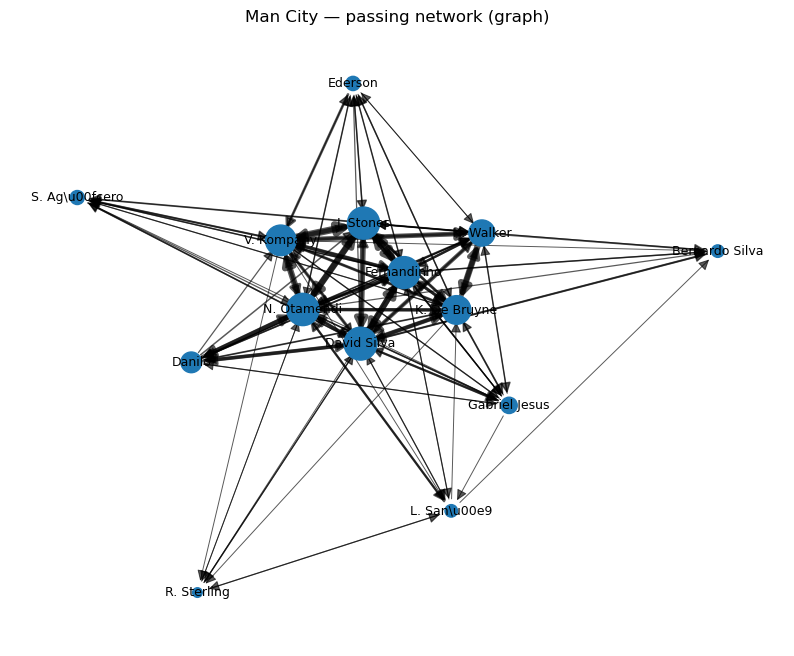

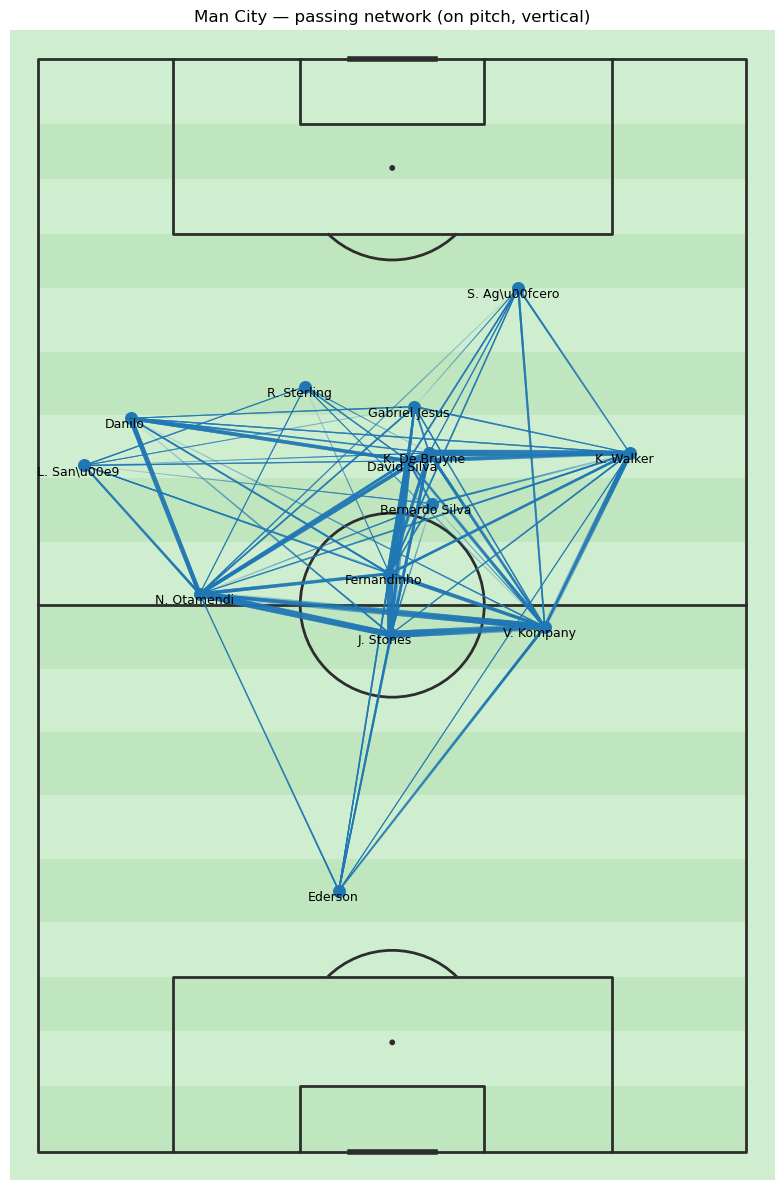

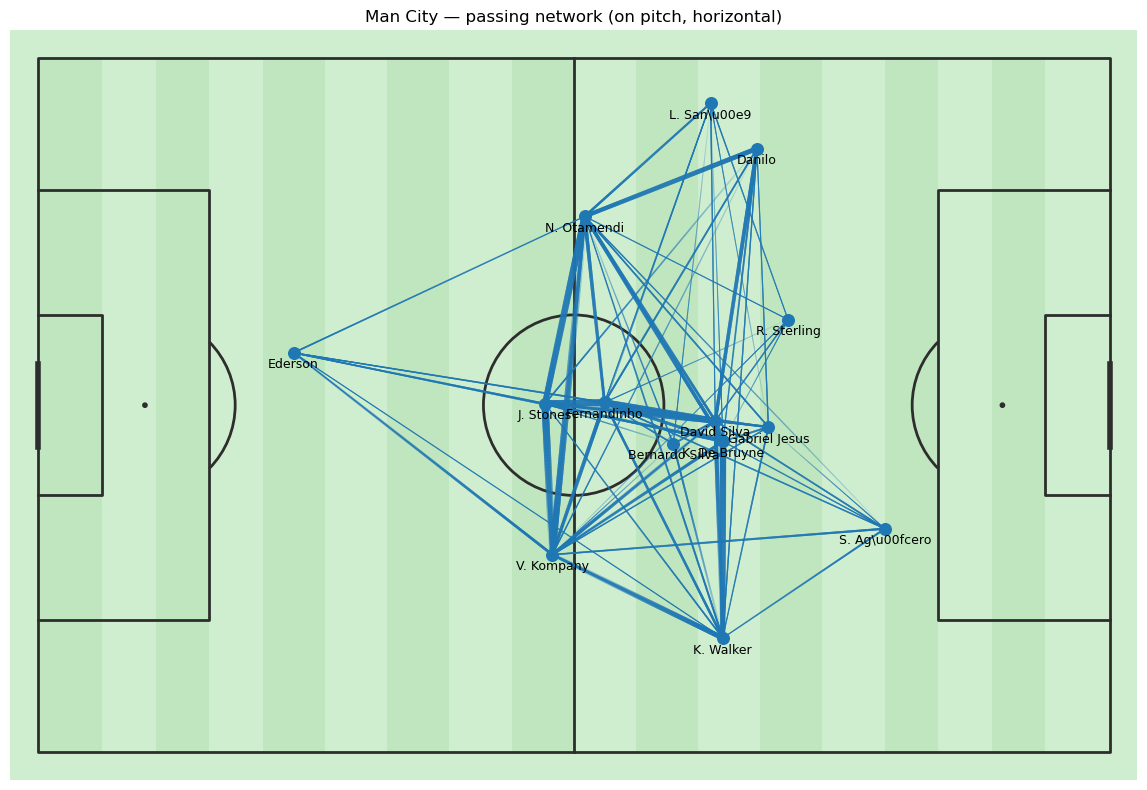

In [12]:
TEAM  = 1625
MATCH = 2499720

# 1) graph layout (networkx)
edges_graph = show_passing_network(
    MATCH, TEAM,
    df_events_net=df_events_net,
    df_match=df_match,
    df_players=df_players,       # optional, for names
    completed_only=True,
    drop_self=True,
    mode="graph",
    title="Man City — passing network (graph)"
)

# 2) on-pitch, vertical, light green
edges_pitch = show_passing_network(
    MATCH, TEAM,
    df_events_net=df_events_net,
    df_match=df_match,
    df_players=df_players,       # optional, for names
    completed_only=True,
    drop_self=True,
    mode="pitch",
    pitch_orientation="vertical",
    pitch_color="#cfeecf",       # light green
    stripe=True,
    stripe_color="#bfe6bf",
    figsize=(8, 12),
    title="Man City — passing network (on pitch, vertical)"
)

# 3) on-pitch, horizontal (if you want to compare)
edges_pitch_h = show_passing_network(
    MATCH, TEAM,
    df_events_net=df_events_net,
    df_match=df_match,
    df_players=df_players,
    completed_only=True,
    drop_self=True,
    mode="pitch",
    pitch_orientation="horizontal",
    pitch_color="#cfeecf",
    stripe=True,
    stripe_color="#bfe6bf",
    figsize=(12, 8),
    title="Man City — passing network (on pitch, horizontal)"
)

In [13]:
import pandas as pd

_PERIOD_ORDER = {"1H": 1, "2H": 2, "E1": 3, "E2": 4, "P": 5}

def _abs_time(period: pd.Series, sec: pd.Series) -> pd.Series:
    base = period.map(_PERIOD_ORDER).fillna(99)
    return base * 1_000_000 + pd.to_numeric(sec, errors="coerce").fillna(0)

def _get_starting_xi(df_match: pd.DataFrame, match_id: int, team_id: int) -> list[int]:
    row = df_match.loc[df_match["match_id"] == match_id]
    if row.empty:
        raise ValueError(f"match_id {match_id} not found in df_match")
    row = row.iloc[0]
    is_home = int(row["home_team_id"]) == int(team_id)
    key = "home_players" if is_home else "away_players"
    players = row[key]
    if not isinstance(players, (list, tuple)) or len(players) < 11:
        raise ValueError(f"{key} must be a list with at least 11 players.")
    return list(pd.Series(players).dropna().astype(int).iloc[:11].values)

def _team_substitutions(df_events_net: pd.DataFrame, match_id: int, team_id: int) -> pd.DataFrame:
    subs = (df_events_net.query("match_id == @match_id and team_id == @team_id and event_name == 'Substitution'")
            .loc[:, ["event_id","period","event_sec","player_id","rel_player_id"]]
            .rename(columns={"player_id":"player_in","rel_player_id":"player_out"}))
    subs = subs.assign(abs_t=_abs_time(subs["period"], subs["event_sec"])) \
               .sort_values(["abs_t","event_id"]).reset_index(drop=True)
    # ensure ints
    for c in ("player_in","player_out"):
        subs[c] = pd.to_numeric(subs[c], errors="coerce").astype("Int64")
    return subs

def _map_slots_for_team_events(ev_team: pd.DataFrame,
                               starting_xi: list[int],
                               subs: pd.DataFrame) -> pd.Series:
    """
    Map each team event row to a slot id 1..11.
    Slots start with the starting XI; when a sub happens (out->in), the same slot is reassigned.
    """
    slot_of_player = {p: i+1 for i, p in enumerate(starting_xi)}  # player_id -> slot
    # prepare substitution pointer
    subs_idx = 0
    nsubs = len(subs)

    slots = []
    # iterate over rows by arrays (fast & safe)
    for current_abs_t, pid in zip(ev_team["abs_t"].values, ev_team["player_id"].astype("Int64").values):
        # apply subs that occurred up to this time
        while subs_idx < nsubs and subs.iloc[subs_idx]["abs_t"] <= current_abs_t:
            out_p = int(subs.iloc[subs_idx]["player_out"]) if pd.notna(subs.iloc[subs_idx]["player_out"]) else None
            in_p  = int(subs.iloc[subs_idx]["player_in"])  if pd.notna(subs.iloc[subs_idx]["player_in"])  else None
            if out_p in slot_of_player and in_p is not None:
                slot = slot_of_player[out_p]
                # reassign slot to incoming player
                slot_of_player.pop(out_p, None)
                slot_of_player[in_p] = slot
            subs_idx += 1

        pid = int(pid) if pd.notna(pid) else None
        slot = slot_of_player.get(pid, None)
        if slot is None:
            # bench player before sub (shouldn't happen) -> temporary negative slot
            slot = -pid if pid is not None else -999999
        slots.append(slot)

    return pd.Series(slots, index=ev_team.index, name="slot_id")

def passing_network_eleven(df_events_net: pd.DataFrame,
                           df_match: pd.DataFrame,
                           match_id: int,
                           team_id: int,
                           completed_only: bool = True,
                           attach_slot_labels: bool = True,
                           df_players: pd.DataFrame | None = None) -> tuple[pd.DataFrame, dict]:
    """
    Build an 11-node passing network where substitutions take over the same slot.
    Returns: (edges_df, slot_labels_dict)
    """
    row = df_match.loc[df_match["match_id"] == match_id, ["home_team_id","away_team_id"]]
    if row.empty:
        raise ValueError(f"match_id {match_id} not found.")
    if int(team_id) not in row.iloc[0].astype("Int64").tolist():
        raise ValueError(f"team_id {team_id} did not play in match {match_id}.")

    # events for the match, with absolute time
    ev = (df_events_net.loc[df_events_net["match_id"] == match_id,
                            ["event_id","event_name","team_id","player_id",
                             "period","event_sec","is_completed",
                             "x_start","y_start","x_end","y_end"]]
          .assign(p_ord=lambda d: d["period"].map(_PERIOD_ORDER).fillna(99),
                  abs_t=lambda d: _abs_time(d["period"], d["event_sec"]))
          .sort_values(["team_id","p_ord","event_sec","event_id"], kind="mergesort")
          .reset_index(drop=True)
          )

    ev_team = ev.loc[ev["team_id"] == team_id].copy()
    starting_xi = _get_starting_xi(df_match, match_id, team_id)
    subs = _team_substitutions(df_events_net, match_id, team_id)

    # slot per event row
    ev_team["slot_id"] = _map_slots_for_team_events(ev_team, starting_xi, subs)

    # receiver slot = next team event's slot
    ev_team["receiver_slot"] = ev_team["slot_id"].shift(-1)

    # keep passes (completed if requested)
    mask = (ev_team["event_name"] == "Pass")
    if completed_only and "is_completed" in ev_team.columns:
        mask &= ev_team["is_completed"].fillna(False)

    passes = ev_team.loc[mask, ["slot_id","receiver_slot"]].dropna().astype(int)

    # only slots 1..11 and no self-passes
    passes = passes[passes["slot_id"].between(1,11) & passes["receiver_slot"].between(1,11)]
    passes = passes[passes["slot_id"] != passes["receiver_slot"]]

    edges = (passes.groupby(["slot_id","receiver_slot"])
                   .size().rename("passes")
                   .reset_index()
                   .rename(columns={"slot_id":"slot_from","receiver_slot":"slot_to"})
                   .sort_values("passes", ascending=False)
                   .reset_index(drop=True))

    # slot labels (starting names + note incoming subs)
    slot_labels = {i+1: "" for i in range(11)}
    id2name = {}
    if df_players is not None and "wyId" in df_players.columns:
        id2name = df_players.set_index("wyId")["shortName"].astype(str).to_dict()

    # initial XI names
    for i, pid in enumerate(starting_xi, start=1):
        slot_labels[i] = id2name.get(pid, str(pid))

    # append info for subs per slot (coarse: we don’t compute exact minute per slot here)
    if not subs.empty:
        # simple text: add incoming names to any slot where outgoing appears in the label
        for _, s in subs.iterrows():
            pout, pin = int(s["player_out"]), int(s["player_in"])
            minute = int((s["abs_t"] % 1_000_000) // 60)
            for sl in range(1,12):
                if str(pout) in slot_labels[sl] or id2name.get(pout,"") in slot_labels[sl]:
                    slot_labels[sl] = f"{slot_labels[sl]} / {id2name.get(pin, str(pin))} ({minute}’)"
                    break

    return edges, slot_labels






In [27]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

def _scale(vals, out_min, out_max):
    """Linear scale helper with safe fallback when all vals are equal."""
    v = np.asarray(vals, dtype=float)
    vmin, vmax = np.nanmin(v), np.nanmax(v)
    if not np.isfinite(vmin) or not np.isfinite(vmax):
        return np.full_like(v, (out_min + out_max) / 2.0)
    if vmax - vmin < 1e-9:
        return np.full_like(v, (out_min + out_max) / 2.0)
    return out_min + (v - vmin) * (out_max - out_min) / (vmax - vmin)

def show_passing_network_slots(
    match_id: int,
    team_id: int,
    *,
    df_events_net: pd.DataFrame,
    df_match: pd.DataFrame,
    completed_only: bool = True,
    mode: str = "pitch",                 # "graph" or "pitch"
    title: str | None = None,
    show_slot_labels: bool = True,       # label nodes as "1..11"

    # --- style knobs (you can tweak these) ---
    node_facecolor: str = "#FF7F0E",     # orange nodes
    node_edgecolor: str = "white",
    node_edgewidth: float = 1.8,
    edge_color: str = "#1F77B4",         # blue edges
    edge_alpha: float = 0.55,
    node_min_size: float = 140,          # scatter size in points^2
    node_max_size: float = 720,
    edge_min_lw: float = 0.8,
    edge_max_lw: float = 6.0,
    label_color: str = "#111111",
    label_size: int = 9,
    label_outline: bool = True,

    # pitch look
    pitch_orientation: str = "vertical", # "vertical" or "horizontal"
    figsize: tuple | None = None,        # None -> auto based on orientation
    pitch_color: str = "#cfeecf",
    line_color: str = "#2d2d2d",
    stripe: bool = True,
    stripe_color: str = "#bfe6bf",
):
    """
    11-slot passing network (subs inherit the slot), with improved visuals.
    Uses `passing_network_eleven` for edges and `average_slot_positions` for node coords.
    """

    # --- edges at slot level
    edges, _ = passing_network_eleven(
        df_events_net=df_events_net,
        df_match=df_match,
        match_id=match_id,
        team_id=team_id,
        completed_only=completed_only,
        attach_slot_labels=False,
        df_players=None,
    )
    if edges.empty:
        print("No passes found for this selection.")
        return edges

    edges = edges.rename(columns={"slot_from": "src", "slot_to": "dst"})
    edges = edges.loc[edges["src"].between(1, 11) & edges["dst"].between(1, 11)]
    edges = edges.loc[edges["src"] != edges["dst"]].reset_index(drop=True)

    # --- node involvement (in+out passes) for sizing
    out_c = edges.groupby("src")["passes"].sum()
    in_c  = edges.groupby("dst")["passes"].sum()
    all_nodes = sorted(set(out_c.index).union(in_c.index))
    involvement = {n: int(out_c.get(n, 0)) + int(in_c.get(n, 0)) for n in all_nodes}

    # ------------------------ PITCH MODE ------------------------
    if mode.lower() == "pitch":
        avg_loc = average_slot_positions(
            df_events_net=df_events_net,
            df_match=df_match,
            match_id=match_id,
            team_id=team_id,
            completed_only=completed_only,
        ).set_index("slot_id")[["x", "y"]]

        def node_xy(slot_id: int):
            if slot_id in avg_loc.index:
                r = avg_loc.loc[slot_id]
                return float(r["x"]), float(r["y"])
            return 50.0, 50.0  # fallback center

        # Build pitch (handle old/new mplsoccer)
        try:
            from mplsoccer import Pitch
            try:
                pitch = Pitch(
                    pitch_type="wyscout",
                    orientation=pitch_orientation,
                    pitch_color=pitch_color,
                    line_color=line_color,
                    stripe=stripe,
                    stripe_color=stripe_color,
                    line_zorder=2,
                )
            except TypeError:
                if pitch_orientation == "vertical":
                    from mplsoccer import VerticalPitch
                    pitch = VerticalPitch(
                        pitch_type="wyscout",
                        pitch_color=pitch_color,
                        line_color=line_color,
                        stripe=stripe,
                        stripe_color=stripe_color,
                        line_zorder=2,
                    )
                else:
                    pitch = Pitch(
                        pitch_type="wyscout",
                        pitch_color=pitch_color,
                        line_color=line_color,
                        stripe=stripe,
                        stripe_color=stripe_color,
                        line_zorder=2,
                    )
        except Exception as e:
            raise ImportError("mplsoccer is required for mode='pitch' (pip install mplsoccer)") from e

        if figsize is None:
            figsize = (8, 12) if pitch_orientation == "vertical" else (12, 8)
        fig, ax = pitch.draw(figsize=figsize)

        # --- edge styling: width & alpha scaled by passes
        lw = _scale(edges["passes"].values, edge_min_lw, edge_max_lw)
        for (x0, y0, x1, y1, w) in zip(
            edges["src"].map(lambda s: node_xy(int(s))[0]),
            edges["src"].map(lambda s: node_xy(int(s))[1]),
            edges["dst"].map(lambda s: node_xy(int(s))[0]),
            edges["dst"].map(lambda s: node_xy(int(s))[1]),
            lw,
        ):
            pitch.lines(
                x0, y0, x1, y1,
                ax=ax,
                lw=float(w),
                color=edge_color,
                alpha=edge_alpha,
                zorder=2.5,
                transparent=True,
            )

        # --- nodes
        slots_in_edges = pd.unique(edges[["src", "dst"]].values.ravel("K"))
        nodes_df = pd.DataFrame({"slot_id": slots_in_edges})
        nodes_df["x"] = nodes_df["slot_id"].map(lambda s: node_xy(int(s))[0])
        nodes_df["y"] = nodes_df["slot_id"].map(lambda s: node_xy(int(s))[1])
        sizes = _scale([involvement.get(int(s), 1) for s in nodes_df["slot_id"]],
                       node_min_size, node_max_size)

        pitch.scatter(
            nodes_df["x"], nodes_df["y"],
            s=sizes,
            ax=ax,
            zorder=3.5,
            edgecolors=node_edgecolor,
            linewidths=node_edgewidth,
            facecolors=node_facecolor,
        )

        # --- labels (slot ids) with halo for readability
        if show_slot_labels:
            for x, y, s in zip(nodes_df["x"], nodes_df["y"], nodes_df["slot_id"]):
                txt = ax.text(
                    x, y - 1.8, str(int(s)),
                    ha="center", va="top", fontsize=label_size,
                    color=label_color, zorder=4.5,
                )
                if label_outline:
                    txt.set_path_effects([pe.withStroke(linewidth=2.4, foreground="white")])

        if title:
            ax.set_title(title, fontsize=12, pad=8)
        plt.show()
        return edges

    # ------------------------ GRAPH MODE ------------------------
    G = nx.from_pandas_edgelist(
        edges, "src", "dst",
        edge_attr="passes", create_using=nx.DiGraph()
    )
    if figsize is None:
        figsize = (10, 8)
    plt.figure(figsize=figsize)

    # Node sizes from involvement
    node_sizes = _scale([involvement.get(n, 1) for n in G.nodes()],
                        node_min_size, node_max_size)
    # Edge widths from passes
    ew = _scale([d.get("passes", 1) for *_ , d in G.edges(data=True)],
                edge_min_lw, edge_max_lw)

    pos = nx.spring_layout(G, k=0.8, seed=42, weight="passes")
    nx.draw_networkx_edges(G, pos,
        width=ew, alpha=edge_alpha, edge_color=edge_color, arrows=True, arrowsize=16)
    nx.draw_networkx_nodes(G, pos,
        node_size=node_sizes, node_color=node_facecolor,
        edgecolors=node_edgecolor, linewidths=node_edgewidth)
    if show_slot_labels:
        nx.draw_networkx_labels(G, pos,
            labels={n: str(n) for n in G.nodes()},
            font_size=label_size, font_color=label_color)
    plt.axis("off")
    if title:
        plt.title(title)
    plt.show()
    return edges


C:\Users\tiago1951\AppData\Local\Temp\ipykernel_43944\2185895285.py:22: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  subs = (df_events_net.query("match_id == @match_id and team_id == @team_id and event_name == 'Substitution'")
C:\Users\tiago1951\AppData\Local\Temp\ipykernel_43944\2185895285.py:22: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  subs = (df_events_net.query("match_id == @match_id and team_id == @team_id and event_name == 'Substitution'")


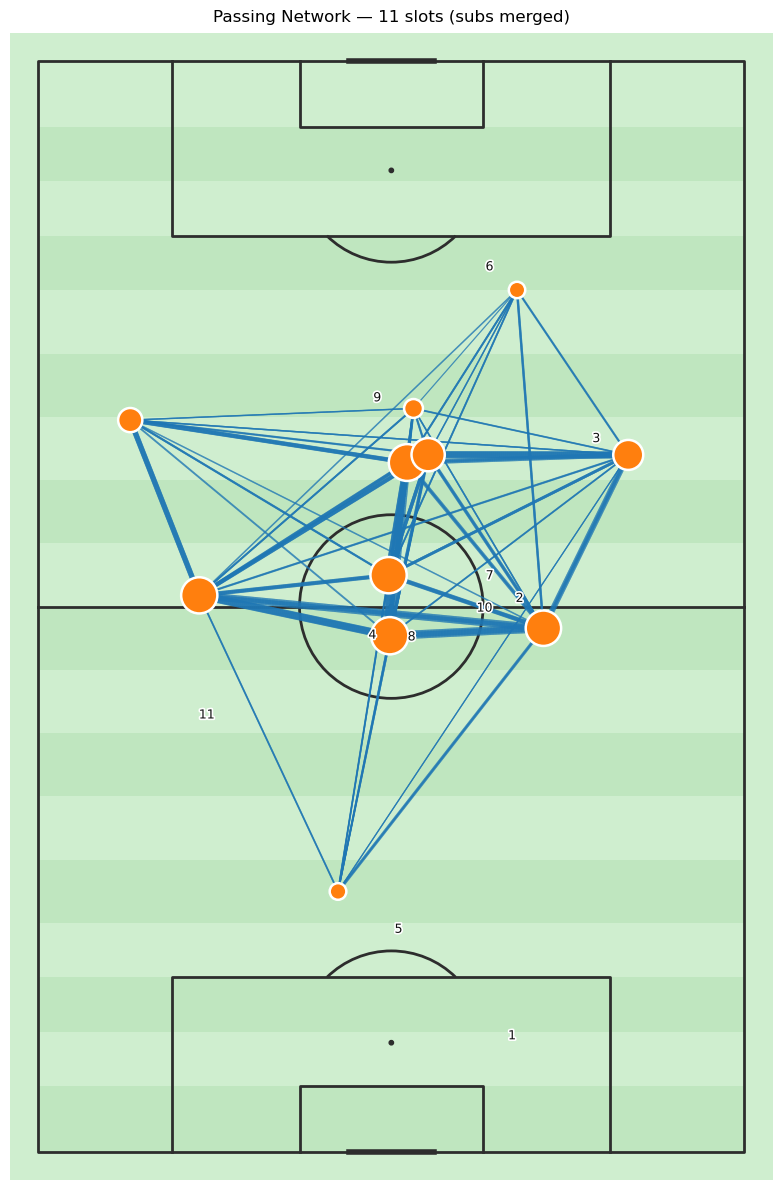

   slot_id          x          y  n_points  n_received  n_sent
0      1.0  67.100000  13.028571        70          35      35
1      2.0  68.166667  53.142857        42          23      19
2      3.0  79.033333  67.800000        30          17      13
3      4.0  47.323864  49.772727       176          86      90
4      5.0  51.027778  22.800000       180          86      94


C:\Users\tiago1951\AppData\Local\Temp\ipykernel_43944\2185895285.py:22: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  subs = (df_events_net.query("match_id == @match_id and team_id == @team_id and event_name == 'Substitution'")


In [28]:
# edges+plot (slots only)
edges = show_passing_network_slots(
    MATCH,
    TEAM,
    df_events_net=df_events_net,
    df_match=df_match,
    completed_only=True,
    mode="pitch",              # or "graph"
    title="Passing Network — 11 slots (subs merged)",
    show_slot_labels=True
)

# get average slot locations directly
avg_slots = average_slot_positions(df_events_net, df_match,MATCH, TEAM)
print(avg_slots.head())




In [23]:
from matplotlib.patches import FancyArrowPatch
